In [1]:
import os, sys
import re
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# I don't know why we need this but we need it otherwise, font.size won't work.
fig = plt.figure(figsize =(12, 6))
fig.show()

plt.rcParams.update({'font.size': 16})

<Figure size 864x432 with 0 Axes>

# Comparison of performance in each arch/device

In [2]:
import json
f = open('arch_compare_result.json')
raw_data = json.load(f)

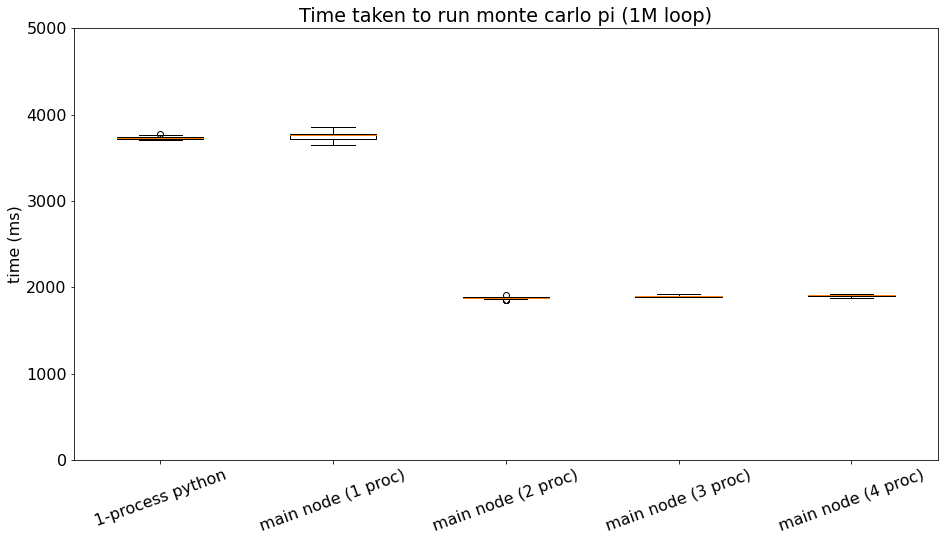

In [3]:
data = []
data.append(raw_data["noVolpy"])
data.append(raw_data["main"]["1"]["total"])
data.append(raw_data["main"]["2"]["total"])
data.append(raw_data["main"]["3"]["total"])
data.append(raw_data["main"]["4"]["total"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["1-process python", "main node (1 proc)", "main node (2 proc)", "main node (3 proc)", "main node (4 proc)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0, ymax=5000)
fig.show()

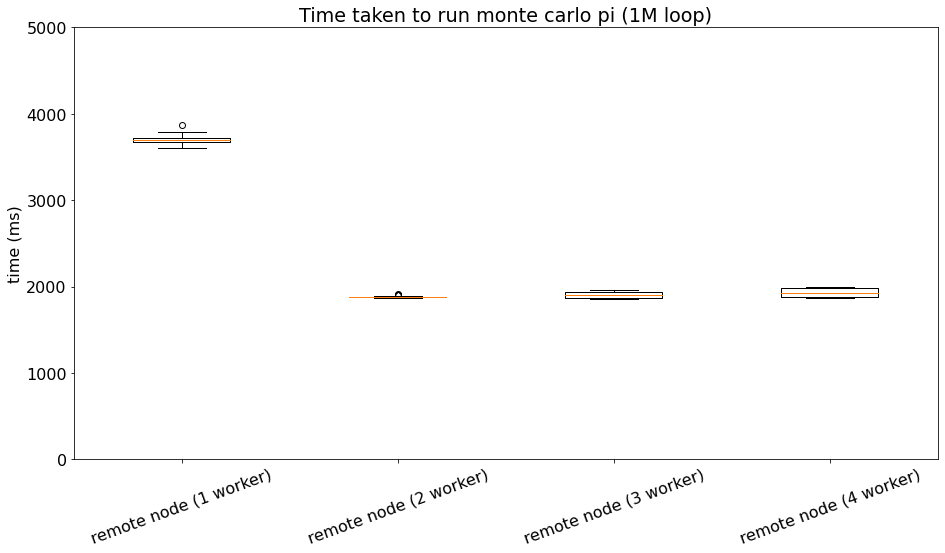

In [4]:
data = []
data.append(raw_data["remote"]["1"]["total"])
data.append(raw_data["remote"]["2"]["total"])
data.append(raw_data["remote"]["3"]["total"])
data.append(raw_data["remote"]["4"]["total"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["remote node (1 worker)", "remote node (2 worker)", "remote node (3 worker)", "remote node (4 worker)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0, ymax=5000)
fig.show()

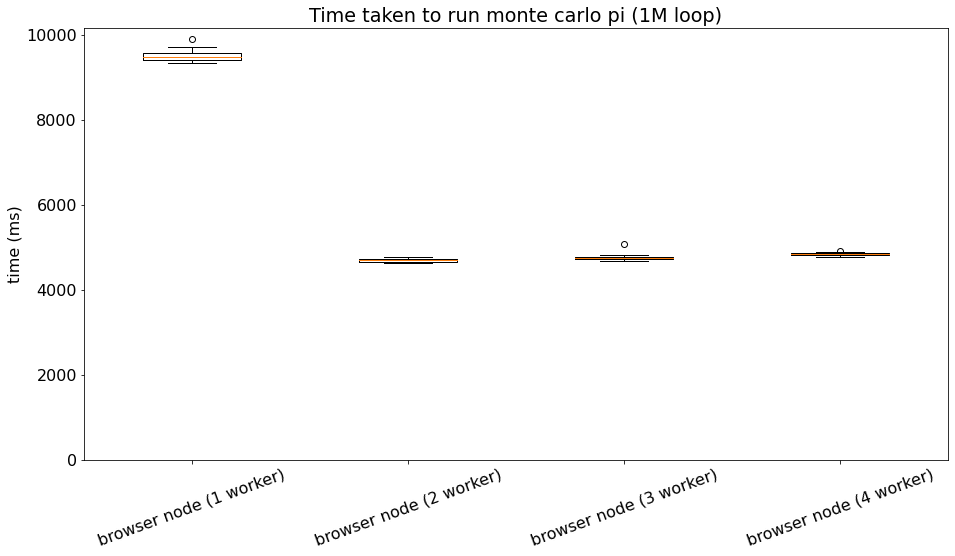

In [5]:
data = []
data.append(raw_data["browser"]["1"]["total"])
data.append(raw_data["browser"]["2"]["total"])
data.append(raw_data["browser"]["3"]["total"])
data.append(raw_data["browser"]["4"]["total"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["browser node (1 worker)", "browser node (2 worker)", "browser node (3 worker)", "browser node (4 worker)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0)
fig.show()

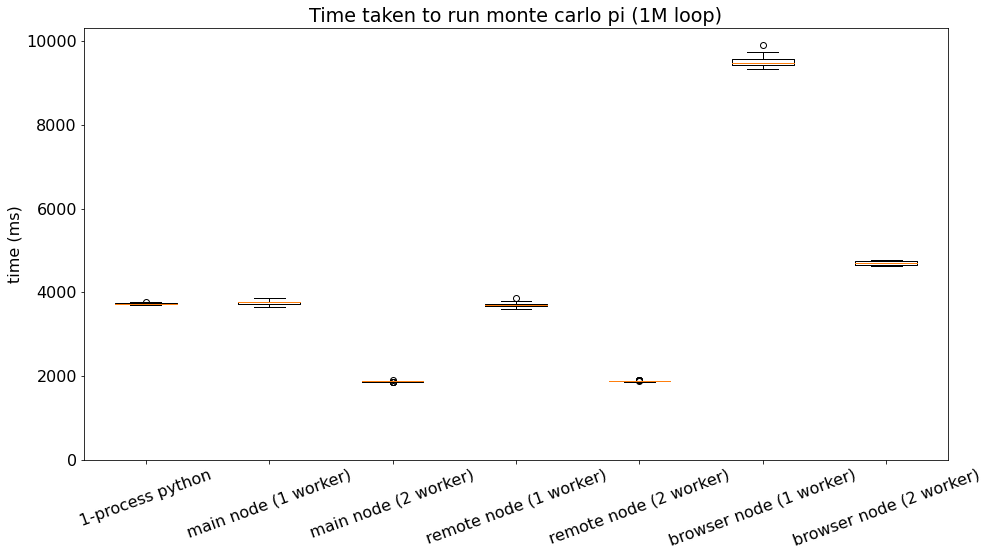

In [6]:
data = []
data.append(raw_data["noVolpy"])
data.append(raw_data["main"]["1"]["total"])
data.append(raw_data["main"]["2"]["total"])
data.append(raw_data["remote"]["1"]["total"])
data.append(raw_data["remote"]["2"]["total"])
data.append(raw_data["browser"]["1"]["total"])
data.append(raw_data["browser"]["2"]["total"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (1M loop)')
xtick = ["1-process python", "main node (1 worker)", "main node (2 worker)", "remote node (1 worker)", "remote node (2 worker)", "browser node (1 worker)", "browser node (2 worker)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0)
fig.show()

# Comparison of real work with varied number of workers

In [7]:
import json
f = open('num_compare_result.json')
raw_data = json.load(f)

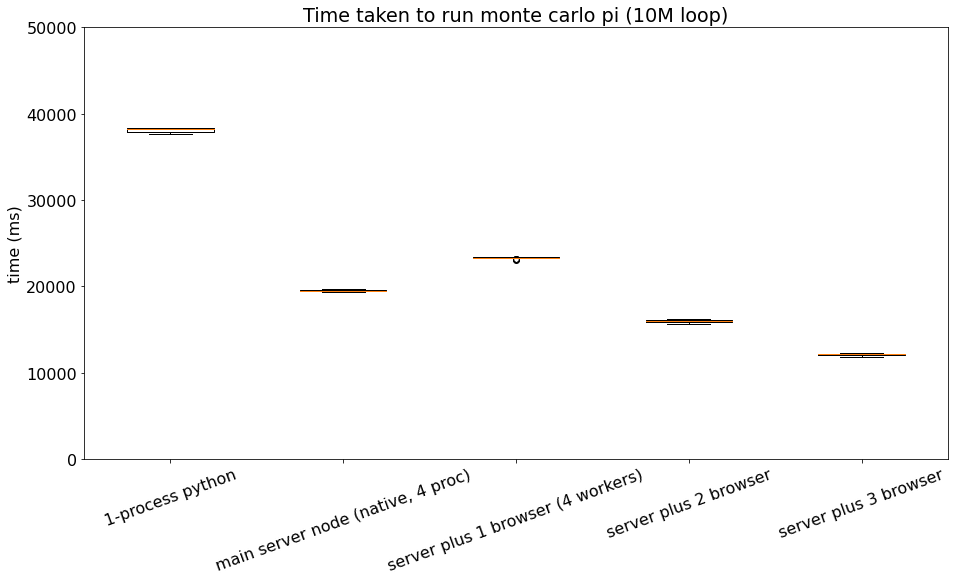

In [8]:
data = []
data.append(raw_data["pi"]["single"])
data.append(raw_data["pi"]["main"]["total"])
data.append(raw_data["pi"]["browser_1"]["total"])
data.append(raw_data["pi"]["browser_2"]["total"])
data.append(raw_data["pi"]["browser_3"]["total"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to run monte carlo pi (10M loop)')
xtick = ["1-process python", "main server node (native, 4 proc)", "server plus 1 browser (4 workers)", "server plus 2 browser", "server plus 3 browser"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0, ymax=50000)
fig.show()

In [9]:
from itertools import chain

data_x = []
data_y = []
def addScatterHistPlot(data_x, data_y, raw_data, ind):
    data_y += raw_data
    data_x += [ind]*len(raw_data)

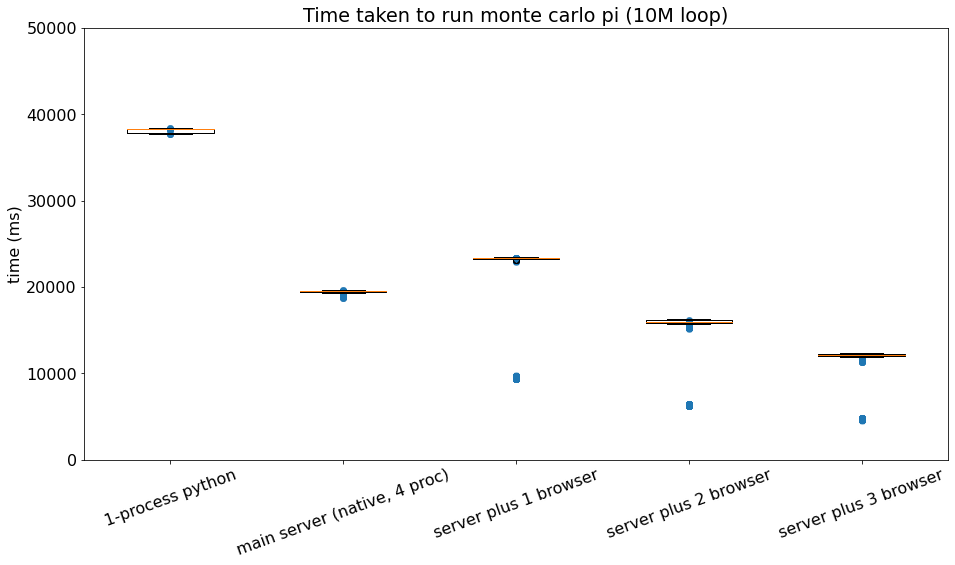

In [10]:
addScatterHistPlot(data_x, data_y, raw_data["pi"]["single"], 1)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["main"]["ea"])), 2)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_1"]["ea"])), 3)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_2"]["ea"])), 4)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_3"]["ea"])), 5)

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
bp = ax.scatter(data_x, data_y, alpha=0.3)
ax.set_title('Time taken to run monte carlo pi (10M loop)')
xtick = ["1-process python", "main server (native, 4 proc)", "server plus 1 browser", "server plus 2 browser", "server plus 3 browser"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0, ymax=50000)
fig.show()

### Comparing with Ray

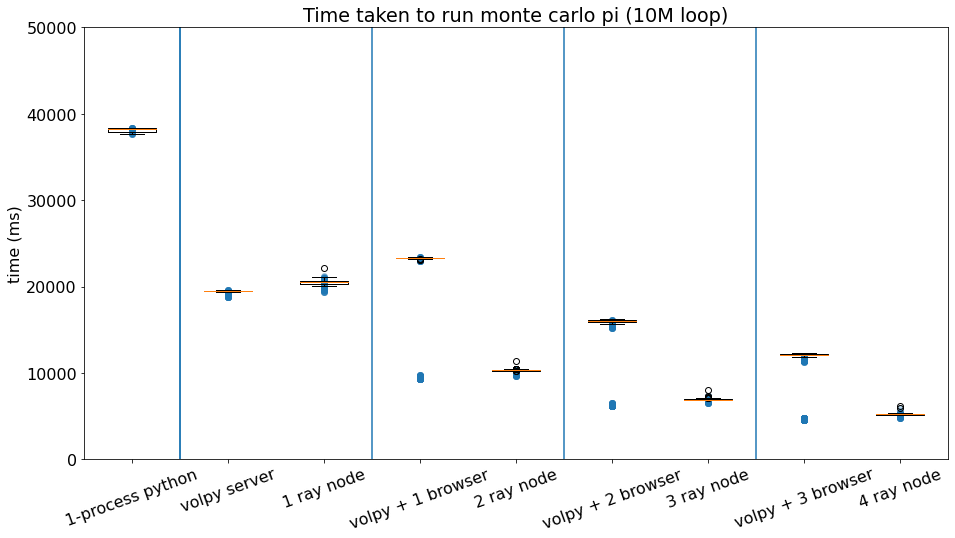

In [23]:
data = []
data_x = []
data_y = []
data.append(raw_data["pi"]["single"])
data.append(raw_data["pi"]["main"]["total"])
data.append(raw_data["pi"]["ray_1"]["total"])
data.append(raw_data["pi"]["browser_1"]["total"])
data.append(raw_data["pi"]["ray_2"]["total"])
data.append(raw_data["pi"]["browser_2"]["total"])
data.append(raw_data["pi"]["ray_3"]["total"])
data.append(raw_data["pi"]["browser_3"]["total"])
data.append(raw_data["pi"]["ray_4"]["total"])

addScatterHistPlot(data_x, data_y, raw_data["pi"]["single"], 1)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["main"]["ea"])), 2)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["ray_1"]["ea"])), 3)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_1"]["ea"])), 4)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["ray_2"]["ea"])), 5)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_2"]["ea"])), 6)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["ray_3"]["ea"])), 7)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["browser_3"]["ea"])), 8)
addScatterHistPlot(data_x, data_y, list(chain.from_iterable(raw_data["pi"]["ray_4"]["ea"])), 9)

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
bp = ax.scatter(data_x, data_y, alpha=0.3)
ax.set_title('Time taken to run monte carlo pi (10M loop)')
xtick = ["1-process python", "volpy server", "1 ray node", "volpy + 1 browser", "2 ray node", "volpy + 2 browser", "3 ray node", "volpy + 3 browser", "4 ray node", ]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
plt.axvline(x=1.5)
for i in range(4):
    plt.axvline(x=1.5+i*2)
ax.set_ylim(ymin=0, ymax=50000)
fig.show()

## Testing on Tree of Task

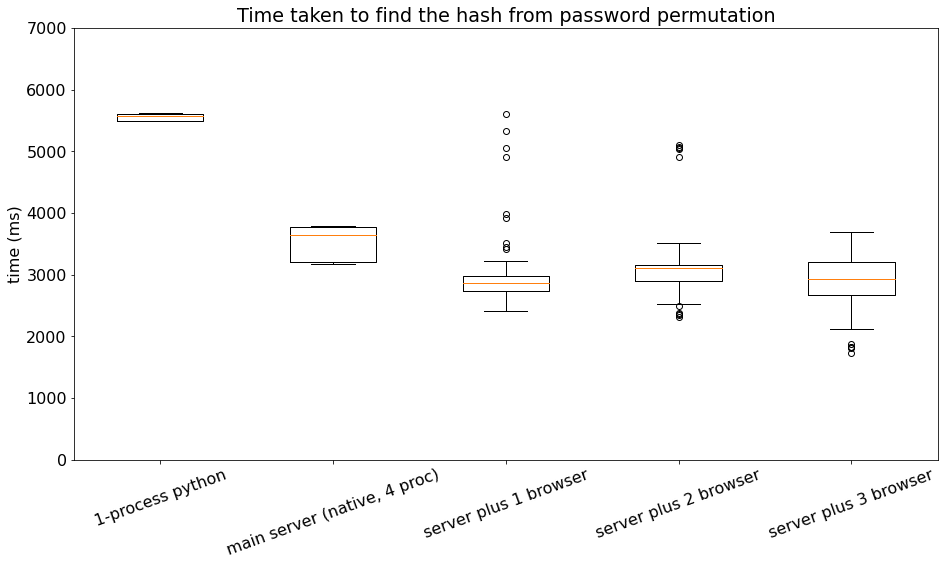

In [24]:
data = []
data.append(raw_data["hash"]["single"])
data.append(raw_data["hash"]["main"])
data.append(raw_data["hash"]["browser_1"])
data.append(raw_data["hash"]["browser_2"])
data.append(raw_data["hash"]["browser_3"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to find the hash from password permutation')
xtick = ["1-process python", "main server (native, 4 proc)", "server plus 1 browser", "server plus 2 browser", "server plus 3 browser"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0, ymax=7000)
fig.show()

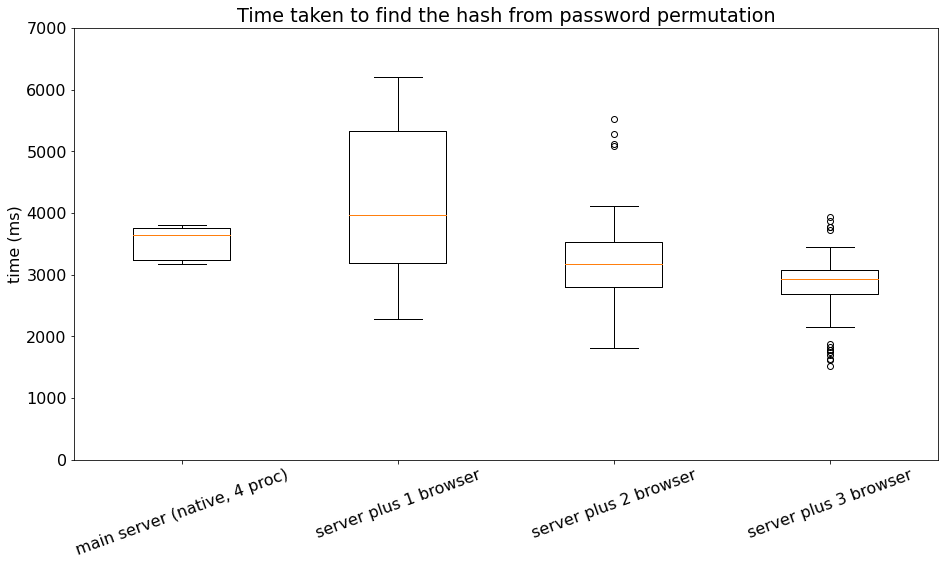

In [25]:
data = []
data.append(raw_data["hash_random_scheduler"]["main"])
data.append(raw_data["hash_random_scheduler"]["browser_1"])
data.append(raw_data["hash_random_scheduler"]["browser_2"])
data.append(raw_data["hash_random_scheduler"]["browser_3"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to find the hash from password permutation')
xtick = ["main server (native, 4 proc)", "server plus 1 browser", "server plus 2 browser", "server plus 3 browser"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
# plt.axvline(x=2.5)
ax.set_ylim(ymin=0, ymax=7000)
fig.show()

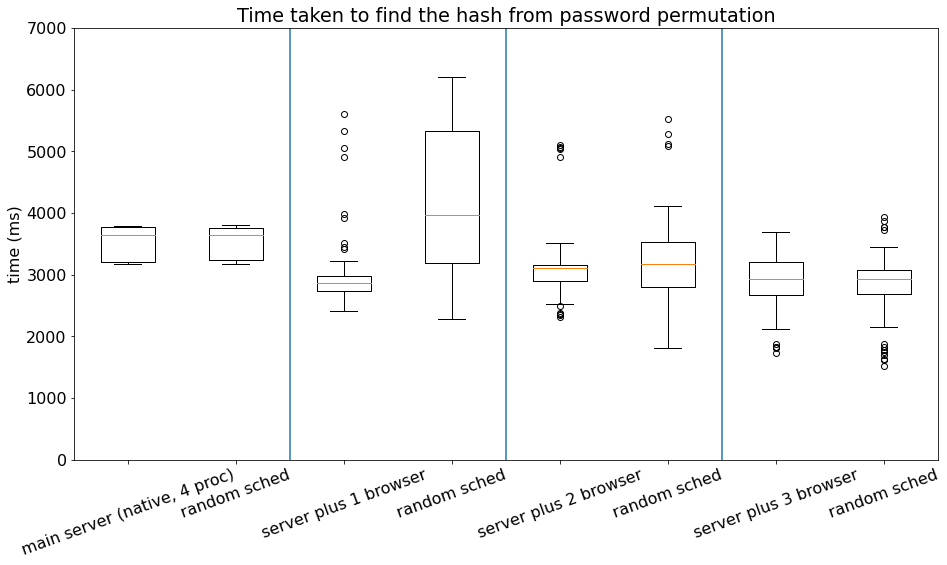

In [26]:
data = []
data.append(raw_data["hash"]["main"])
data.append(raw_data["hash_random_scheduler"]["main"])
data.append(raw_data["hash"]["browser_1"])
data.append(raw_data["hash_random_scheduler"]["browser_1"])
data.append(raw_data["hash"]["browser_2"])
data.append(raw_data["hash_random_scheduler"]["browser_2"])
data.append(raw_data["hash"]["browser_3"])
data.append(raw_data["hash_random_scheduler"]["browser_3"])

fig = plt.figure(figsize =(12, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken to find the hash from password permutation')
xtick = ["main server (native, 4 proc)", "random sched", "server plus 1 browser", "random sched", "server plus 2 browser", "random sched", "server plus 3 browser", "random sched"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (ms)')
plt.axvline(x=2.5)
plt.axvline(x=4.5)
plt.axvline(x=6.5)
ax.set_ylim(ymin=0, ymax=7000)
fig.show()